# Trata as palavras-chave dos arquivos de audio

## Carrega a tabela que faz referencia aos arquivos de audio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa

from librosa.feature import mfcc
from scipy.io.wavfile import read as wavread
from scipy.io.wavfile import write as wavwrite

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

/home/usrp/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from datasetHandler import Handler

dataset = Handler('Dataset_idx.csv')
df = dataset.ReadTable()

df.head()

,Unnamed: 0,type,recOOV,file,idx_abre,Unnamed: 5
0,0,MISC,100,Estevan_3.wav,[4730 76320 131880 180000 212000],NaN
1,1,MISC,100,Marina_1.wav,[29450 106430 165400 214060 330190],NaN
2,2,MISC,100,Marina_4.wav,[12170 82450 138570 180800 218120 280850 347250],NaN
3,3,MISC,100,Marina_6.wav,[25130 57970 125860 199900 239820 277720 33808...,NaN
4,4,MISC,100,Natan_1.wav,[25670 107110 162700 208770 332250],NaN


## Formata as colunas de indexação em formatos de lista 

In [4]:
KwIndexs = dataset.ReadIndexs()

# x = df['idx_abre']
# iAbre = {}
# for i in range(len(x)):
#     p = x[i]
#     p = p.replace('[','')
#     p = p.replace(']','')
    
#     p = p.split(' ')
# #     print(p)
#     if p[0] != '':
#         iAbre[i] = list(map(int, p))
#     else:
#         iAbre[i] = list(map(int,[-1e9])) 

In [5]:
KwIndexs['abre'][0]

[4730, 76320, 131880, 180000, 212000]

## Definição das constantes

Com índices de cada arquivo de audio para cada palavra-chave, temos o centro de cada _frame_ que conterá as respectivas palavras-chave. 

Então, agora é preciso configurar todos os parâmetros para extração de _feature_ para a entrada. 
Isso ocorre pois estes parâmetros alterarão os tamanhos de _frames_ que serão agora coletados para cada _keyword_   

In [6]:
fs = 8000 # taxa de amostragem dos arquivos de audio

n_fft= 512   # tamanho da FFT para extração dos MFCCs
hop_length=0 # pulo entre cada frame
n_mels= 50   # numero de filtros MEL
n_mfcc= 8   # numero de coeficientes MFCC
ofs_mfcc=2   # offset dado para não utilizar os primeiros coeficientes MFCC      

fmin=100    # frequencia mínima do MFCC
fmax=4000   # frequencia máxima do MFCC

n_frames_MFCC = 10 # numero de frames MFCC que será usado para o reconhecimento.

frame_len = (n_frames_MFCC-1)*n_fft # tamanho do frame recortado para cada entrada
frame_lenD2 = int(frame_len/2) # tamanho do frame dividido por 2

In [7]:
frame_len, frame_lenD2

(4608, 2304)

## Extração das _Features_ que contém a palavra-chave

Agora que todas as constantes necessárias ja foram declaradas, é extraído de cada arquivo de áudio os _frames_ contendo a palavras-chave, conforme indexado por `iAbre[i]`.

Após extraído tais _frames_, é realizado o cálculo do MFCC para a extração das _features_ de cada _frame_.

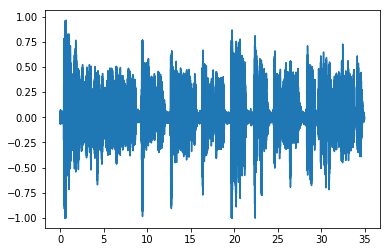

In [11]:
wavstr = df['file'][0]  # extrai a string contendo o nome do arquivo de audio
[_, data_file] = wavread(wavstr) # Lê todo o arquivo de audio

data_file = data_file/32767 # normaliza as amostras do  áudio para o range [-1,1]
N = data_file.shape[0]

t = np.linspace(0, N/fs, N)
plt.plot(t, data_file)

In [8]:
frameMFCC = {}
kwFeat = {}
for i in range(len(df['file'])):
    wavstr = df['file'][i]  # extrai a string contendo o nome do arquivo de audio
    [_, data_file] = wavread(wavstr) # Lê todo o arquivo de audio

    data_file = data_file/32767 # normaliza as amostras do  áudio para o range [-1,1]
    N = data_file.shape[0]      # indica o tamanho do arquivo

#     # quando necessário é plotado o áudio do arquivo 
#     t = np.linspace(0, N/fs, N)
#     plt.plot(t, data_file)
    for j in range(len(iAbre[i])): # para cada audio, retira os frames kw e as features
        if iAbre[i][j] < 0:
            break
        
        frameSample = data_file[iAbre[i][j]-frame_lenD2:iAbre[i][j]+frame_lenD2]
        MFCCsample = librosa.feature.mfcc(y=frameSample, sr=fs, fmin=fmin, fmax=fmax, 
                                             n_mfcc=n_mfcc, n_mels=n_mels, n_fft=n_fft)

        frameMFCC[j] = MFCCsample[ofs_mfcc:]
    
    kwFeat[i] = frameMFCC

NameError: name 'iAbre' is not defined

In [7]:
kwFeat = dataset.IdxFrameProcess(func= mfcc, sr=fs, fmin=fmin, 
                                    fmax=fmax, n_mfcc=n_mfcc, n_mels=n_mels,
                                    n_fft=n_fft, frame_len=frame_len, 
                                    frame_lenD2=frame_lenD2)

ParameterError: data must be of type numpy.ndarray

In [9]:
pp = {}
pp['daaa'] = 10


In [10]:
pp.keys()

dict_keys(['daaa'])

In [29]:
def pt(**kwargs):
    for key, value in kwargs.items():
        print("The value of {} is {}".format(key, value))
#     del kwargs['my_name']
#     print(kwargs['my_name'])
    print(my_name)
    
pt(my_name="Sammy", your_name="Casey")

The value of your_name is Casey
Sammy


number of keyword inputs: 106
number of keyword test inputs: 16


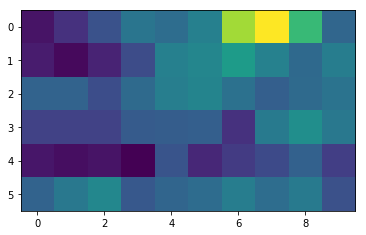

In [59]:
lenKW_1 = 0
for i in range(len(df['file'])):
    if df['file'][i].find('Vitor') == -1:
        for j in range(len(iAbre[i])):
            if iAbre[i][j] < 0:
                break
            
            lenKW_1=lenKW_1+1

lenKW_1_test = 0
for i in range(len(df['file'])):
    if df['file'][i].find('Vitor') != -1:
        for j in range(len(iAbre[i])):
            if iAbre[i][j] < 0:
                break
            
            lenKW_1_test=lenKW_1_test+1
            
print('number of keyword inputs:',lenKW_1)
print('number of keyword test inputs:',lenKW_1_test)
imgplot = plt.imshow(kwFeat[0][7])

In [42]:
list(map(int,['100']))

[100]

## Extração dos indices e das _Features_ _Out of Vocabulary_

Para treinar a rede, é necessário utilizar exemplos do que não é as palavras-chave, chamadas de _Out Of Vocabulary Word_ (OOV _words_).
Então, é indexado aleatoriamente trechos dos áudios contendo palavras OOV, para posteriormente a extração das _features_.

In [60]:
# OOV_lenght = 100 # gera OOV_length OutOfVoc frames por audio
OOV_lenght = list(map(int,df['recOOV'])) # gera OOV_length OutOfVoc frames por audio
iOOV = {}
# iOOVk = np.zeros(OOV_lenght)

for i in range(len(df['file'])):
    wavstr = df['file'][i]  # extrai a string contendo o nome do arquivo de audio
    [_, data_file] = wavread(wavstr) # Lê todo o arquivo de audio

    data_file = data_file/32767 # normaliza as amostras do  áudio para o range [-1,1]
    N = data_file.shape[0]      # indica o tamanho do arquivo
#     print(N)
    
    iOOVk = np.zeros(OOV_lenght[i])

    for k in range(OOV_lenght[i]):
        # tenta adquirir indices que indicam frames com Out Of Voc words
        # de forma aleatoria
        goodId = False
        while goodId == False:
            idx = np.random.randint(N-frame_len)+frame_lenD2 # gera numero aleatorio
            goodId = True
            for j in range(len(iAbre[i])): # analisa o indice criado com os indices das kw
                if abs(idx-iAbre[i][j]) < frame_len:
                    goodId = False
        
        iOOVk[k] = idx
            
    iOOV[i] = iOOVk.astype(int)

In [44]:
iOOV[1]

array([182969,  54956,  87677, 237408, 241084, 203156, 270651, 289215,
       234721, 349166, 198761, 258948, 207012, 197135, 257477, 303062,
        24073, 138193,  88347, 390978,  83784, 118796, 312600,  58795,
       374266,  66938, 280251, 228914, 445843, 156796, 112749, 159258,
       306972, 306596, 315801, 124472,  82249, 123693, 150818,  37428,
       434060, 219351, 150011,  87422, 114189, 337273,  87186,   5113,
        85571, 417358, 231166, 139757,  15519, 262055, 397586,  84804,
       352497, 415601, 394025,  80407, 298623, 346022,  73813, 273323,
       283935, 409339, 425418, 350269, 308855, 182264, 353281, 415252,
       136068, 389086, 285802,  45277, 405550, 174870, 171476,  22345,
       239531, 382316, 177709, 233517, 136860, 418399,  67094, 432825,
       247763, 195742,  20410, 120006, 131282, 443084, 314181, 149781,
       229293, 100097, 289926, 115191])

### Gera arquivo de audio contendo os trechos OOV para analise

In [61]:
i=2
wavstr = df['file'][i]  # extrai a string contendo o nome do arquivo de audio
[_, data_file] = wavread(wavstr) # Lê todo o arquivo de audio

data_file = data_file/32767 # normaliza as amostras do  áudio para o range [-1,1]
N = data_file.shape[0]      # indica o tamanho do arquivo

#     # quando necessário é plotado o áudio do arquivo 
#     t = np.linspace(0, N/fs, N)
#     plt.plot(t, data_file)

frameSample = np.zeros((frame_len,len(iOOV[i])))
for j in range(len(iOOV[i])): # para cada audio, retira os frames kw e as features
    frameSample[:,j] = data_file[iOOV[i][j]-frame_lenD2:iOOV[i][j]+frame_lenD2]

frameSample = frameSample.T.reshape(-1)
wavwrite('framesOOV.wav', fs, frameSample)

### Extração das Features OOV

In [62]:
frameMFCC = {}
oovFeat = {}
for i in range(len(df['file'])):
    wavstr = df['file'][i]  # extrai a string contendo o nome do arquivo de audio
    [_, data_file] = wavread(wavstr) # Lê todo o arquivo de audio

    data_file = data_file/32767 # normaliza as amostras do  áudio para o range [-1,1]
    N = data_file.shape[0]      # indica o tamanho do arquivo

#     # quando necessário é plotado o áudio do arquivo 
#     t = np.linspace(0, N/fs, N)
#     plt.plot(t, data_file)
    for j in range(len(iOOV[i])): # para cada audio, retira os frames kw e as features
        frameSample = data_file[iOOV[i][j]-frame_lenD2:iOOV[i][j]+frame_lenD2]
        
        MFCCsample = librosa.feature.mfcc(y=frameSample, sr=fs, fmin=fmin, fmax=fmax, 
                                             n_mfcc=n_mfcc, n_mels=n_mels, n_fft=n_fft)
        
        frameMFCC[j] = MFCCsample[ofs_mfcc:]
    
    oovFeat[i] = frameMFCC

number of out-of-voc inputs: 2140
number of out-of-voc test inputs: 320


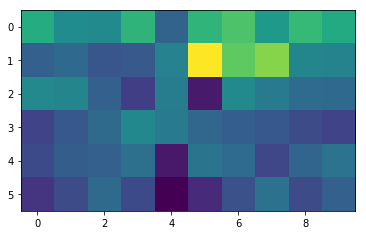

In [63]:
lenOOV = 0
for i in range(len(df['file'])):
    if df['file'][i].find('Vitor') == -1:
        for j in range(len(iOOV[i])):
            lenOOV=lenOOV+1

lenOOVtest = 0
for i in range(len(df['file'])):
    if df['file'][i].find('Vitor') != -1:
        for j in range(len(iOOV[i])):
            lenOOVtest=lenOOVtest+1
            
print('number of out-of-voc inputs:', lenOOV)
print('number of out-of-voc test inputs:', lenOOVtest)

imgplot = plt.imshow(oovFeat[0][99])

# Preparando o _Data Array_

Neste ponto é gerado _arrays_ para dados de treinamento e de teste.

Para isso, é atribuido _arrays_ de elementos OOV e elementos KW, concatenados, embaralhados, e separados em dados de treinamento e de teste.   

In [48]:
def splitData(x, y, p=0.2): # funcao para embaralhar e separar os dados em treinamento e teste
    shapeInX = x.shape
    shapeInY = y.shape
    datax = x.reshape(shapeInX[0],-1)
    
    data = np.concatenate((datax, y), axis=1)
    # random.randint(0, int(x.shape[0]*(1-p)))
    xScrambled = np.random.permutation(data)
    nLines = xScrambled.shape[0]

    data_train = xScrambled[0:int(round(nLines*(1-p))), :]
    data_test = xScrambled[int(round(nLines*(1-p))):, :]
#     print(nLines)
#     print(data_train.shape)
    
    shape_train = np.asarray(shapeInX)
    shape_train[0] = data_train.shape[0]
    x_train = data_train[:,:data_train.shape[1]-shapeInY[1]].reshape(tuple(shape_train))
    y_train = data_train[:,[data_train.shape[1]-shapeInY[1]]]
    
    
    shape_test = np.asarray(shapeInX)
    shape_test[0] = data_test.shape[0]
    x_test = data_test[:,:data_test.shape[1]-shapeInY[1]].reshape(tuple(shape_test))
    y_test = data_test[:,data_test.shape[1]-shapeInY[1]:]
    
    
    return (x_train, y_train), (x_test, y_test)

In [49]:
# gera os arrays OOV e KW, com suas respectivas labels
x_OOV = np.zeros((lenOOV, oovFeat[0][0].shape[0], oovFeat[0][0].shape[1],1))
x_KW_1 = np.zeros((lenKW_1, oovFeat[0][0].shape[0], oovFeat[0][0].shape[1],1))

x_OOV_test = np.zeros((lenOOVtest, oovFeat[0][0].shape[0], oovFeat[0][0].shape[1],1))
x_KW_1_test = np.zeros((lenKW_1_test, oovFeat[0][0].shape[0], oovFeat[0][0].shape[1],1))

# y_OOV = np.concatenate((np.ones((lenOOV, 1)), np.zeros((lenOOV,  1))), axis=1)
# y_KW_1 = np.concatenate((np.zeros((lenKW_1,  1)), np.ones((lenKW_1, 1))), axis=1)
y_OOV = np.zeros((lenOOV,  1))
y_KW_1 = np.ones((lenKW_1, 1))

y_OOV_test = np.zeros((lenOOVtest,  1))
y_KW_1_test = np.ones((lenKW_1_test, 1))

k=0
m=0
for i in range(len(df['file'])):
    if df['file'][i].find('Vitor') == -1:
        for j in range(len(iOOV[i])): 
            x_OOV[k,:,:,0] = oovFeat[i][j]
            k=k+1
    else:
        for j in range(len(iOOV[i])): 
            x_OOV_test[m,:,:,0] = oovFeat[i][j]
            m=m+1
        

k=0
m=0
for i in range(len(df['file'])):
    if df['file'][i].find('Vitor') == -1:
        for j in range(len(iAbre[i])):
            if iAbre[i][j] < 0:
                break
            x_KW_1[k,:,:,0] = kwFeat[i][j]
            k=k+1
    else:
        for j in range(len(iAbre[i])): 
            if iAbre[i][j] < 0:
                break
                
            x_KW_1_test[m,:,:,0] = kwFeat[i][j]
            m=m+1

print('Keyword Abre Array Shape:', x_KW_1.shape)
print('Out Of Voc Array Shape:', x_OOV.shape)
        
x = np.concatenate((x_OOV, x_KW_1), axis=0)
y = np.concatenate((y_OOV, y_KW_1), axis=0)

x_t = np.concatenate((x_OOV_test, x_KW_1_test), axis=0)
y_t = np.concatenate((y_OOV_test, y_KW_1_test), axis=0)

print('\nConcatenate Array Shape:', x.shape)

# print(x.shape)
# print(x_OOV.shape)
# print(x_KW_1.shape)
# print(y.shape)
# print(y_OOV.shape)
# print(y_KW_1.shape)

# (x_train, y_train), (x_test, y_test) = splitData(x, y, p=0.0)
(x_train, y_train), _ = splitData(x, y, p=0.0)
(x_test, y_test), _   = splitData(x_t, y_t, p=0.0)

print('\nTrain data shape:', x_train.shape)
print('Test data shape:', x_test.shape)

# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)

print('\ncounting of Truth keywords in Test Data:', list(y_test[:]).count(1))
print('counting of OOV words in Test Data:', list(y_test[:]).count(0))

Keyword Abre Array Shape: (106, 6, 10, 1)
Out Of Voc Array Shape: (2140, 6, 10, 1)

Concatenate Array Shape: (2246, 6, 10, 1)

Train data shape: (2246, 6, 10, 1)
Test data shape: (336, 6, 10, 1)

counting of Truth keywords in Test Data: 16
counting of OOV words in Test Data: 320


# Test with Convolutional Layers

In [77]:
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten

input_shape = x_train.shape[1:]
num_classes = 2

# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

print(input_shape)
model = Sequential()
model.add(Conv2D(3, kernel_size=(2, 3), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(2, kernel_size=(2, 3), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Conv2D(4, (2, 2), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# model.add(Dense(10, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
#           validation_split=0.1,
          epochs=50,
          batch_size=128)

score = model.evaluate(x_test, y_test, batch_size=100)
print('Test model with data_test:', 100*score[1],'%')

(6, 10, 1)
Epoch 1/50
2246/2246 [==============================] - 1s 440us/step - loss: 7.9394 - acc: 0.1478
Epoch 2/50
2246/2246 [==============================] - 0s 61us/step - loss: 4.7573 - acc: 0.2551
Epoch 3/50
2246/2246 [==============================] - 0s 59us/step - loss: 2.3255 - acc: 0.4871
Epoch 4/50
2246/2246 [==============================] - 0s 64us/step - loss: 1.0893 - acc: 0.6683
Epoch 5/50
2246/2246 [==============================] - 0s 67us/step - loss: 0.6205 - acc: 0.7801
Epoch 6/50
2246/2246 [==============================] - 0s 64us/step - loss: 0.4099 - acc: 0.8433
Epoch 7/50
2246/2246 [==============================] - 0s 57us/step - loss: 0.2994 - acc: 0.8936
Epoch 8/50
2246/2246 [==============================] - 0s 63us/step - loss: 0.2420 - acc: 0.9096
Epoch 9/50
2246/2246 [==============================] - 0s 60us/step - loss: 0.2039 - acc: 0.9185
Epoch 10/50
2246/2246 [==============================] - 0s 60us/step - loss: 0.1706 - acc: 0.9372
Epoch 1

In [51]:
score

[0.008375595634182295, 1.0]

In [52]:
frameMFCC.shape

AttributeError: 'dict' object has no attribute 'shape'

In [22]:
idxFile = 0
idxSmp  = 3

k=0
for i in range(len(df['file'])):
    for j in range(len(iAbre[i])):
#         plt.imshow(kwFeat[i][j])
#         plt.show()
        k=k+1

print(k)

74


In [25]:
wavwrite('frame.wav', fs, frame1)